<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/1002_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [2]:
iris = load_iris()
x = iris.data
y = iris.target
print(x.shape, y.shape)

(150, 4) (150,)


In [3]:
pca = PCA(n_components = 2)
pca.fit(x)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [4]:
x_transformed = pca.transform(x)
print(x_transformed.shape)

(150, 2)


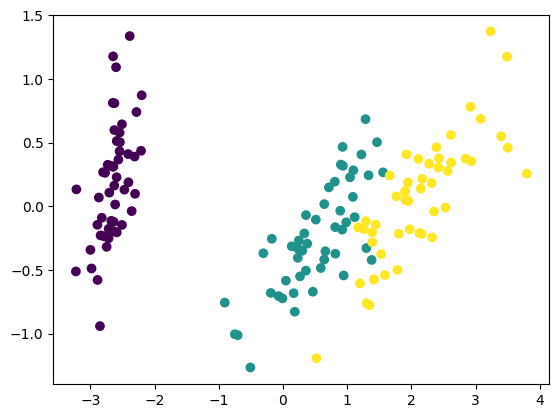

In [7]:
plt.scatter(*zip(*x_transformed), c=y)

In [8]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [30]:
def normalize(x):
    x_min = np.min(x, axis=0)
    x_max = np.max(x, axis=0)
    x_range = abs(x_max-x_min)
    x -= x_min
    x /= x_range
    return x

In [13]:
x = normalize(x)
y2 = np.zeros((y.shape[0], 3), dtype=int)
for i in range(y.shape[0]):
    y2[i, y[i]] = 1
y = y2
x.shape, y.shape

In [26]:
ann = Sequential([
    Dense(10, input_dim=4, activation="relu"),
    Dense( 7, activation="relu"),
    Dense( 12, activation="relu"),
    Dense( 10, activation="relu"),
    Dense( 3, activation="softmax"),
])
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                50        
                                                                 
 dense_6 (Dense)             (None, 7)                 77        
                                                                 
 dense_7 (Dense)             (None, 12)                96        
                                                                 
 dense_8 (Dense)             (None, 10)                130       
                                                                 
 dense_9 (Dense)             (None, 3)                 33        
                                                                 
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________


In [27]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
hist = ann.fit(x, y, epochs=100, batch_size=10, verbose=2)

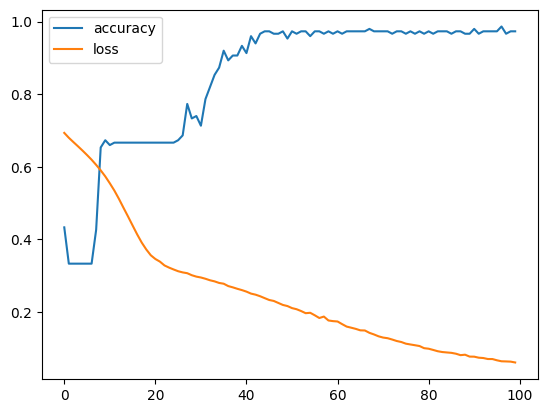

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(["accuracy", "loss"])
plt.show()

# After PCA

In [31]:
x_t = normalize(x_transformed)
print(np.min(x_t, axis=0), np.max(x_t, axis=0))

[0. 0.] [1. 1.]


In [34]:
ann = Sequential([
    Dense(10, input_dim=2, activation="relu"),
    Dense( 7, activation="relu"),
    Dense( 12, activation="relu"),
    Dense( 10, activation="relu"),
    Dense( 3, activation="softmax"),
])
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                30        
                                                                 
 dense_16 (Dense)            (None, 7)                 77        
                                                                 
 dense_17 (Dense)            (None, 12)                96        
                                                                 
 dense_18 (Dense)            (None, 10)                130       
                                                                 
 dense_19 (Dense)            (None, 3)                 33        
                                                                 
Total params: 366
Trainable params: 366
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
hist = ann.fit(x_t, y, epochs=100, batch_size=10, verbose=2)

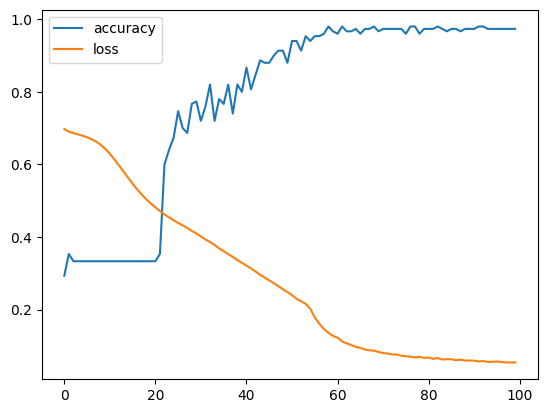

In [36]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(["accuracy", "loss"])
plt.show()